George Mason University, Fairfax, VA 22030

Department of Data Analytics Engineering

Course : DAEN 690

Team name: Team Raiders

Project: Transport Decision Making

Instructor : Dr Issac K Gang

Team Members:

Rakesh Subramani Kaleeshwaran
Bhavana Emmadi
Siri Chandana Keerthipati
Aishwarya Sharma

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import re
import bs4 as bs
from datetime import timedelta
import urllib.request
import pandas as pd
import numpy as np
import kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

import matplotlib
# import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [49]:
data = pd.read_csv("/Volumes/Personal/DAEN 690 - Project/data_model.csv")
data = data.drop(['Unnamed: 0'], axis =1)

Having a separate data by removing those columns which are not important for the algorithm to fit.

In [5]:
data1 = data.drop(['PatientID','Facility Name','Facility_Type_Of_Facility'],axis =1)

In [6]:
data1.columns

Index(['ShiftDay', 'TourOfShift', 'IncidentFirstDue', 'InitialIncidentType',
       'DispatchedIncidentType', 'ArrivedIncidentType', 'FinalIncidentType',
       'FinalIncidentTypeDescription', 'ResponseUnitID', 'UnitStation',
       'UnitType', 'UnitArrivalOrder', 'TransportUnitID', 'TransportLOC',
       'TransportHospitalCode', 'ReasonForChoosingHospital', 'PatientAge',
       'Total_Number_of_procedures_performed', 'Procedure_given_ALS?',
       'Total_Number_of_medications_given', 'Medication_given_ALS?',
       'Number_of_units_responded', 'Number_of_units_transported',
       'Travel_time_taken', 'Time_taken_to_be_atscene',
       'Total_time_from_report_hospital', 'clean_primary_impression',
       'Number of providers', 'SecondaryImpression', 'Unitotheractions_taken',
       'Unitprimaryactions_taken', 'ProcedurePerformed', 'MedicationGiven',
       'Facility_Hospital_Designation_List', 'Distance'],
      dtype='object')

Getting the dummies or one hot vectors of all the columns which have only single values in them.

In [7]:
data1 = pd.get_dummies(data1, columns = ['ShiftDay','TourOfShift','IncidentFirstDue', 
                                        'InitialIncidentType', 'DispatchedIncidentType', 'ArrivedIncidentType', 
                                        'FinalIncidentType', 'UnitStation', 'ResponseUnitID', 'UnitType', 
                                        'UnitArrivalOrder', 'TransportUnitID', 'TransportLOC', 'TransportHospitalCode',
                                        'PatientAge', 'Procedure_given_ALS?', 'Medication_given_ALS?', 'clean_primary_impression', 
                                        'FinalIncidentTypeDescription'])

To have one hot encode the data columns which have the data separated by ',' or '|' so that all the values were
and then one hot encoded.

In [8]:
data1 = pd.concat([data1.drop('ReasonForChoosingHospital', 1), data1['ReasonForChoosingHospital'].str.get_dummies(sep="|").add_prefix('reason_')], 1)
data1 = pd.concat([data1.drop('SecondaryImpression', 1), data1['SecondaryImpression'].str.get_dummies(sep=",").add_prefix('SecondaryImpression_')], 1)
data1 = pd.concat([data1.drop('MedicationGiven', 1), data1['MedicationGiven'].str.get_dummies(sep="|").add_prefix('MedicationGiven_')], 1)
data1 = pd.concat([data1.drop('ProcedurePerformed', 1), data1['ProcedurePerformed'].str.get_dummies(sep="|").add_prefix('ProcedurePerformed_')], 1)
data1 = pd.concat([data1.drop('Facility_Hospital_Designation_List', 1), data1['Facility_Hospital_Designation_List'].str.get_dummies(sep=",").add_prefix('Facility_Hospital_Designation_List_')], 1)
data1 = pd.concat([data1.drop('Unitotheractions_taken', 1), data1['Unitotheractions_taken'].str.get_dummies(sep="|").add_prefix('Unitotheractions_taken_')], 1)
data1 = pd.concat([data1.drop('Unitprimaryactions_taken', 1), data1['Unitprimaryactions_taken'].str.get_dummies(sep="|").add_prefix('Unitprimaryactions_taken_')], 1)


/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_18103/4034899230.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data1 = pd.concat([data1.drop('ReasonForChoosingHospital', 1), data1['ReasonForChoosingHospital'].str.get_dummies(sep="|").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_18103/4034899230.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data1 = pd.concat([data1.drop('ReasonForChoosingHospital', 1), data1['ReasonForChoosingHospital'].str.get_dummies(sep="|").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_18103/4034899230.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data1 = pd.concat([data1.drop('SecondaryImpression', 1), data1['S

For having ranges number of clusters from 1 to 11.
The Kmode clustering were fitted and then the fit, was evaluated with the inertia and the inertia for each fit was 
stored in a variable for getting elbow method.

In [13]:
cost_out_1 = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data1)
    cost_out_1.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3495812.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 3495812.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 3495812.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 3495812.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 3495812.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 46137, cost: 3098133.0
Run 1, iteration: 2/100, moves: 19698, cost: 3056139.0
Run 1, iteration: 3/100, moves: 7628, cost: 3052747.0
Run 1, iteration: 4/100, moves: 121, cost: 3052747.0
Init: initializing centroi

Run 5, iteration: 2/100, moves: 17861, cost: 2709970.0
Run 5, iteration: 3/100, moves: 3274, cost: 2709914.0
Run 5, iteration: 4/100, moves: 124, cost: 2709914.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 50198, cost: 2669951.0
Run 1, iteration: 2/100, moves: 14756, cost: 2662358.0
Run 1, iteration: 3/100, moves: 2452, cost: 2662358.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 43023, cost: 2712691.0
Run 2, iteration: 2/100, moves: 15883, cost: 2699188.0
Run 2, iteration: 3/100, moves: 10087, cost: 2682965.0
Run 2, iteration: 4/100, moves: 4049, cost: 2673667.0
Run 2, iteration: 5/100, moves: 4073, cost: 2673667.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 45882, cost: 2650271.0
Run 3, iteration: 2/100, moves: 16217, cost: 2643603.0
Run 3, iteration: 3/100, move

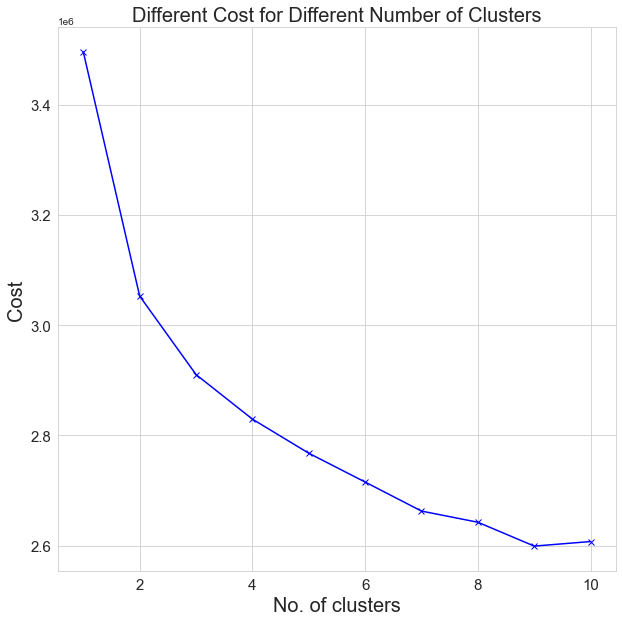

In [14]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.plot(K, cost_out_1, 'bx-')
plt.xlabel('No. of clusters',size=20)
plt.ylabel('Cost',size=20)
plt.title('Different Cost for Different Number of Clusters', size=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Taking only the subset of the data and then fitting the K mode clustering for that subset of the data.

In [18]:
data_nk = data.drop(['PatientID', 'PatientAge', 'Total_Number_of_procedures_performed',
                     'Total_Number_of_medications_given','Number_of_units_responded',
                     'Unitprimaryactions_taken', 'Time_taken_to_be_atscene', 'Total_time_from_report_hospital', 
                     'Distance', 'SecondaryImpression', 'InitialIncidentType', 'DispatchedIncidentType','ArrivedIncidentType',
                     'FinalIncidentTypeDescription','ResponseUnitID', 'UnitStation','UnitArrivalOrder',
                     'TransportUnitID', 'IncidentFirstDue','ShiftDay', 'TourOfShift','TransportHospitalCode',
                     'Number_of_units_transported','Unitotheractions_taken','ProcedurePerformed', 'MedicationGiven',
                     'Facility_Type_Of_Facility','UnitType', 'Facility Name',
                     'Number of providers','Travel_time_taken'], axis =1)


In [19]:
data_nk

,FinalIncidentType,TransportLOC,ReasonForChoosingHospital,Procedure_given_ALS?,Medication_given_ALS?,clean_primary_impression,Facility_Hospital_Designation_List
0,ASSAULT,Level 4 (BLS Care),closest facility,none_given,none_given,injury,hospital
1,ASSAULT,Level 2 (ALS Care),protocol,0.0,none_given,gi/gu,hospital
2,MEDICAL,Level 4 (BLS Care),closest facility,none_given,none_given,pain,hospital
3,ALS,Level 4 (BLS Care),closest facility,none_given,none_given,weakness,hospital
4,ALS,Level 3 (ALS Care),closest facility,1.0,0.0,respiratory,hospital
...,...,...,...,...,...,...,...
123778,ACCI,Level 4 (BLS Care),patient choice,0.0,none_given,injury,none
123779,ODF,Level 3 (ALS Care),patient choice,0.0,none_given,abuse of drugs or overdose,none
123780,ALS,Level 3 (ALS Care),patient choice,0.0,0.0,gi/gu,none
123781,ALS,Level 3 (ALS Care),patient choice,0.0,none_given,weakness,none


In [20]:
data_nk.columns

Index(['FinalIncidentType', 'TransportLOC', 'ReasonForChoosingHospital',
       'Procedure_given_ALS?', 'Medication_given_ALS?',
       'clean_primary_impression', 'Facility_Hospital_Designation_List'],
      dtype='object')

Getting the dummies or one hot vectors of all the columns which have only single values in them.

In [21]:
data_nk = pd.get_dummies(data_nk, columns = ['FinalIncidentType',
                                        'clean_primary_impression', 'TransportLOC','Procedure_given_ALS?', 'Medication_given_ALS?'])

To have one hot encode the data columns which have the data separated by ',' or '|' so that all the values were
and then one hot encoded.

In [22]:
data_nk = pd.concat([data_nk.drop('ReasonForChoosingHospital', 1), data_nk['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
data_nk = pd.concat([data_nk.drop('Facility_Hospital_Designation_List', 1), data_nk['Facility_Hospital_Designation_List'].str.get_dummies(sep=",").add_prefix('Facility_Hospital_Designation_List_')], 1)


/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_18103/1206746034.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_nk = pd.concat([data_nk.drop('ReasonForChoosingHospital', 1), data_nk['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_18103/1206746034.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data_nk = pd.concat([data_nk.drop('ReasonForChoosingHospital', 1), data_nk['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_18103/1206746034.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_nk = pd.concat([data_nk.drop('Facility_Hospital_

For having ranges number of clusters from 1 to 11.
The Kmeans clustering were fitted and then the fit, was evaluated with the inertia and the inertia for each fit was 
stored in a variable for getting elbow method.

In [24]:
cost_out_nk = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data_nk)
    cost_out_nk.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 867952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 867952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 867952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 867952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 867952.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 42426, cost: 695802.0
Run 1, iteration: 2/100, moves: 20422, cost: 680272.0
Run 1, iteration: 3/100, moves: 148, cost: 680272.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, i

Run 4, iteration: 3/100, moves: 1120, cost: 471314.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 35988, cost: 480889.0
Run 5, iteration: 2/100, moves: 2499, cost: 480889.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 21303, cost: 495218.0
Run 1, iteration: 2/100, moves: 2372, cost: 495218.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 37691, cost: 441556.0
Run 2, iteration: 2/100, moves: 10180, cost: 437873.0
Run 2, iteration: 3/100, moves: 2380, cost: 437873.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 51248, cost: 452083.0
Run 3, iteration: 2/100, moves: 11647, cost: 447845.0
Run 3, iteration: 3/100, moves: 8573, cost: 447845.0
Init: initializing centroids
Init: initializing clusters
Starting ite

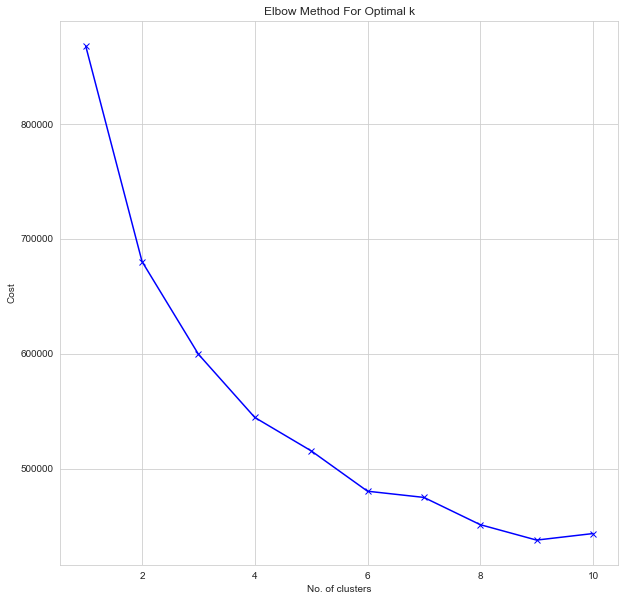

In [25]:
plt.plot(K, cost_out_nk, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

PCA analysis using the covariance of the data and the number of components to get the best n_components in the data.

In [26]:
covar_matrix = PCA(n_components = 50) 
covar_matrix.fit(data_nk)

#Calculate variance ratios
variance_nk = covar_matrix.explained_variance_ratio_ 
var_nk = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var_nk

array([19.6, 34.8, 42.5, 49.8, 56.2, 62.1, 67.2, 70.5, 73.2, 75.5, 77.7,
       79.6, 81.5, 83.4, 85.1, 86.7, 88. , 89.1, 90.2, 91.2, 92. , 92.7,
       93.4, 94.1, 94.7, 95.2, 95.7, 96.2, 96.6, 97. , 97.4, 97.7, 98. ,
       98.2, 98.4, 98.6, 98.8, 99. , 99.1, 99.2, 99.3, 99.4, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5, 99.5])

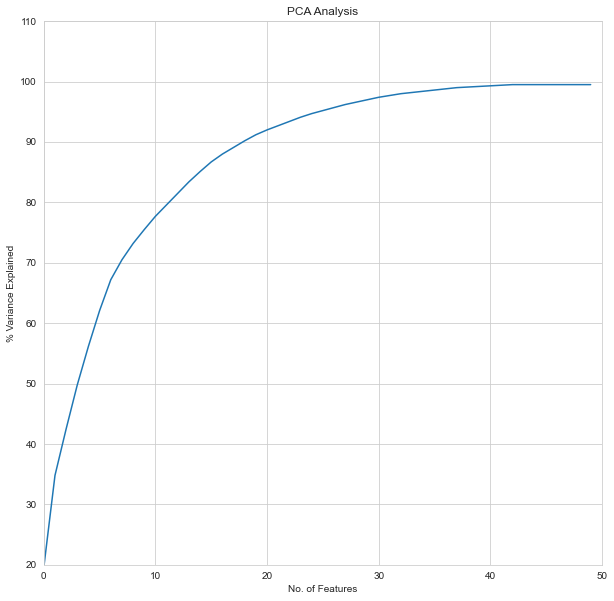

In [28]:
plt.ylabel('% Variance Explained', size = 15)
plt.xlabel('No. of Features', size = 15)
plt.title('PCA Analysis', size = 15)
plt.ylim(20,110)
plt.xlim(0,50)
plt.plot(var_nk)

minmaxscalar method to normalize the data.

fitting the pca on the optimal number of output components that were mentioned in the previous graph.

In [29]:
min_max_scaler = preprocessing.StandardScaler()
pc_datnk = min_max_scaler.fit_transform(data_nk)

pc_datnk2 = pd.DataFrame(pc_datnk)
# reduce to 2 importants features

pca = PCA(n_components= 20)
ppc_nk = pca.fit_transform(pc_datnk2)
ppc_nk

array([[ 3.34592598e+00,  8.96185401e-03,  2.66630397e+00, ...,
         4.44732590e-01,  2.94184309e+00,  3.49942102e-01],
       [ 1.00492461e-01,  1.48565177e+00,  2.31390013e+00, ...,
        -4.01848869e-01,  2.14429842e+00,  2.13305106e-01],
       [ 3.95854272e+00,  3.29061026e-01,  4.19936424e-01, ...,
        -3.35233822e-01, -1.03833563e-01, -2.84189669e-02],
       ...,
       [ 1.93920732e-01,  5.89803370e+00, -4.95827202e+00, ...,
        -3.30157087e-01, -7.37636300e-01, -1.85168181e-01],
       [ 1.39962076e+00,  4.93181891e+00, -5.93697705e+00, ...,
         2.24097044e+00, -7.00342799e-04,  3.88265900e-01],
       [ 1.10519296e+00,  5.33492853e+00, -4.12550927e+00, ...,
         7.62994072e-01, -4.55122535e-01,  1.22523038e+00]])

In [30]:
pca_cost_nk = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(ppc_nk)
    pca_cost_nk.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2453220.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2453220.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2453220.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2453220.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2453220.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2453200.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2453200.0
Init: initializing centroids
Init: initializing clusters
Star

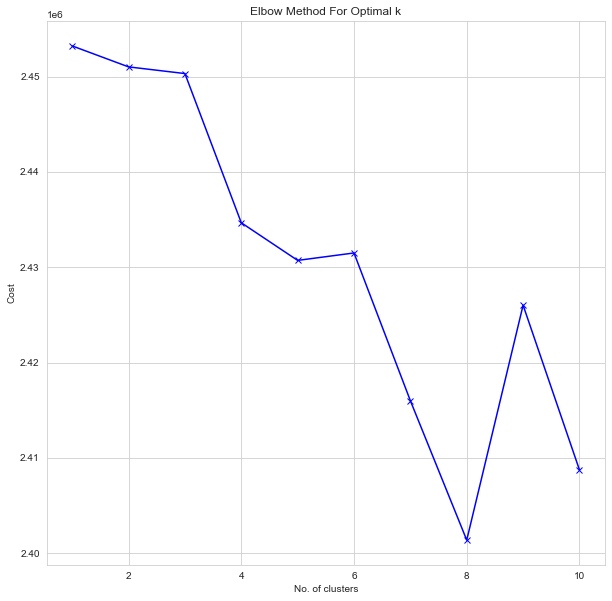

In [31]:
plt.plot(K, pca_cost_nk, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Taking only the subset of the data and then fitting the K mode clustering for that subset of the data.

But this time only a part of the data was one hot encoded.

In [55]:
data_gg = data.drop(['PatientID', 'PatientAge', 'Total_Number_of_procedures_performed',
                     'Total_Number_of_medications_given','Number_of_units_responded',
                     'Unitprimaryactions_taken', 'Time_taken_to_be_atscene', 'Total_time_from_report_hospital',
                     'Distance', 'SecondaryImpression', 'InitialIncidentType', 'DispatchedIncidentType',
                     'ArrivedIncidentType','FinalIncidentTypeDescription','ResponseUnitID',
                     'UnitStation','UnitArrivalOrder','TransportUnitID', 'IncidentFirstDue',
                     'ShiftDay', 'TourOfShift','TransportHospitalCode','Number_of_units_transported',
                     'Unitotheractions_taken','ProcedurePerformed', 'MedicationGiven', 'Facility_Type_Of_Facility',
                     'UnitType','Number of providers','Travel_time_taken','Facility Name'], axis =1)


In [56]:
data_gg

,FinalIncidentType,TransportLOC,ReasonForChoosingHospital,Procedure_given_ALS?,Medication_given_ALS?,clean_primary_impression,Facility_Hospital_Designation_List
0,ASSAULT,Level 4 (BLS Care),closest facility,none_given,none_given,injury,hospital
1,ASSAULT,Level 2 (ALS Care),protocol,0.0,none_given,gi/gu,hospital
2,MEDICAL,Level 4 (BLS Care),closest facility,none_given,none_given,pain,hospital
3,ALS,Level 4 (BLS Care),closest facility,none_given,none_given,weakness,hospital
4,ALS,Level 3 (ALS Care),closest facility,1.0,0.0,respiratory,hospital
...,...,...,...,...,...,...,...
123778,ACCI,Level 4 (BLS Care),patient choice,0.0,none_given,injury,none
123779,ODF,Level 3 (ALS Care),patient choice,0.0,none_given,abuse of drugs or overdose,none
123780,ALS,Level 3 (ALS Care),patient choice,0.0,0.0,gi/gu,none
123781,ALS,Level 3 (ALS Care),patient choice,0.0,none_given,weakness,none


In [57]:
data_gg = pd.concat([data_gg.drop('ReasonForChoosingHospital', 1), data_gg['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
data_gg = pd.concat([data_gg.drop('Facility_Hospital_Designation_List', 1), data_gg['Facility_Hospital_Designation_List'].str.get_dummies(sep=",").add_prefix('Facility_')], 1)


/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_1698/533824879.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_gg = pd.concat([data_gg.drop('ReasonForChoosingHospital', 1), data_gg['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_1698/533824879.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data_gg = pd.concat([data_gg.drop('ReasonForChoosingHospital', 1), data_gg['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_1698/533824879.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_gg = pd.concat([data_gg.drop('Facility_Hospital_Design

Fitting the data for the K mode clustering with clusters ranging from 1 to 11.


In [58]:
cost_out_gg = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data_gg)
    cost_out_gg.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 641903.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 641903.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 641903.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 641903.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 641903.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 26362, cost: 484081.0
Run 1, iteration: 2/100, moves: 4911, cost: 484081.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 32271, cost: 503604.0
Run 2, 

Starting iterations...
Run 3, iteration: 1/100, moves: 28509, cost: 307901.0
Run 3, iteration: 2/100, moves: 9313, cost: 307901.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 40809, cost: 314253.0
Run 4, iteration: 2/100, moves: 13892, cost: 312121.0
Run 4, iteration: 3/100, moves: 686, cost: 312121.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 24223, cost: 323523.0
Run 5, iteration: 2/100, moves: 4647, cost: 323523.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 34175, cost: 306516.0
Run 1, iteration: 2/100, moves: 7271, cost: 301912.0
Run 1, iteration: 3/100, moves: 1279, cost: 301912.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 42246, cost: 319582.0
Run 2, iteration: 2/100, moves: 9782, cost: 317

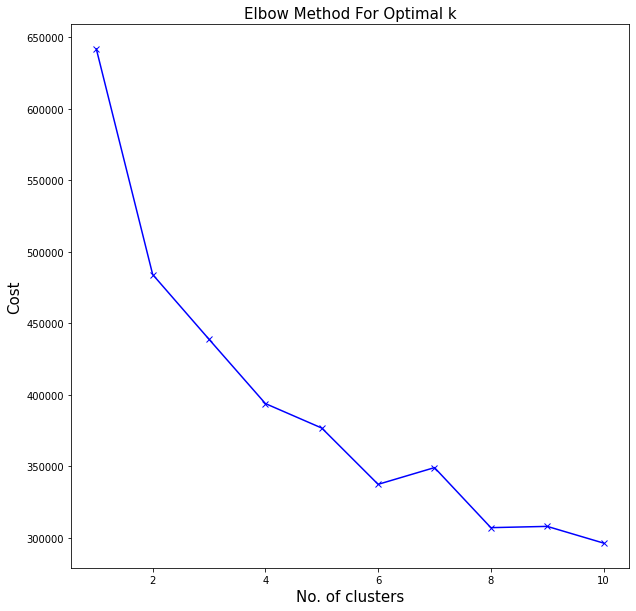

In [59]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
plt.plot(K, cost_out_gg, 'bx-')
plt.xlabel('No. of clusters', size = 15)
plt.ylabel('Cost', size = 15)
plt.title('Elbow Method For Optimal k' , size =15)
plt.show()

Taking only the subset of the data and then fitting the K mode clustering for that subset of the data.
And one hot encoding the complete data. 

In [73]:
data_jsh = data.drop(['PatientID', 'PatientAge', 'TransportLOC',
                      'Total_Number_of_procedures_performed','Total_Number_of_medications_given',
                      'Number_of_units_responded','Unitprimaryactions_taken', 'Time_taken_to_be_atscene',
                      'Total_time_from_report_hospital', 'Distance', 'SecondaryImpression',
                      'InitialIncidentType', 'DispatchedIncidentType','ArrivedIncidentType',
                      'FinalIncidentTypeDescription','ResponseUnitID', 'UnitStation','UnitArrivalOrder',
                      'TransportUnitID', 'IncidentFirstDue','ShiftDay', 'TourOfShift','TransportHospitalCode',
                      'Number_of_units_transported','Unitotheractions_taken','ProcedurePerformed', 'MedicationGiven', 
                      'Facility_Type_Of_Facility','UnitType', 'Facility Name',
                      'Number of providers','Travel_time_taken'], axis =1)

In [74]:
data_jsh.columns

Index(['FinalIncidentType', 'ReasonForChoosingHospital',
       'Procedure_given_ALS?', 'Medication_given_ALS?',
       'clean_primary_impression', 'Facility_Hospital_Designation_List'],
      dtype='object')

In [75]:
data_jsh = pd.get_dummies(data_jsh, columns = ['FinalIncidentType',
                                        'clean_primary_impression','Procedure_given_ALS?', 'Medication_given_ALS?'])

In [76]:
data_jsh

,ReasonForChoosingHospital,Facility_Hospital_Designation_List,FinalIncidentType_ACCI,FinalIncidentType_ALS,FinalIncidentType_AMED,FinalIncidentType_ASLTWF,FinalIncidentType_ASSAULT,FinalIncidentType_CAVEIN,FinalIncidentType_CPRF,FinalIncidentType_FACCIF,...,clean_primary_impression_sepsis,clean_primary_impression_stroke,clean_primary_impression_syncope,clean_primary_impression_weakness,Procedure_given_ALS?_0.0,Procedure_given_ALS?_1.0,Procedure_given_ALS?_none_given,Medication_given_ALS?_0.0,Medication_given_ALS?_1.0,Medication_given_ALS?_none_given
0,closest facility,hospital,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,protocol,hospital,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,closest facility,hospital,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,closest facility,hospital,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,closest facility,hospital,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123778,patient choice,none,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
123779,patient choice,none,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
123780,patient choice,none,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
123781,patient choice,none,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [77]:
cost_jsh = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data_jsh)
    cost_jsh.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 535122.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 535122.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 535122.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 535122.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 535122.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 41826, cost: 409810.0
Run 1, iteration: 2/100, moves: 5575, cost: 409810.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 57803, cost: 409810.0
Run 2, 

Starting iterations...
Run 4, iteration: 1/100, moves: 27583, cost: 319934.0
Run 4, iteration: 2/100, moves: 1433, cost: 319934.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 32420, cost: 291022.0
Run 5, iteration: 2/100, moves: 14931, cost: 285961.0
Run 5, iteration: 3/100, moves: 3196, cost: 285961.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 40709, cost: 323333.0
Run 1, iteration: 2/100, moves: 137, cost: 323333.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 22802, cost: 320481.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 30910, cost: 291838.0
Run 3, iteration: 2/100, moves: 1844, cost: 291838.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/

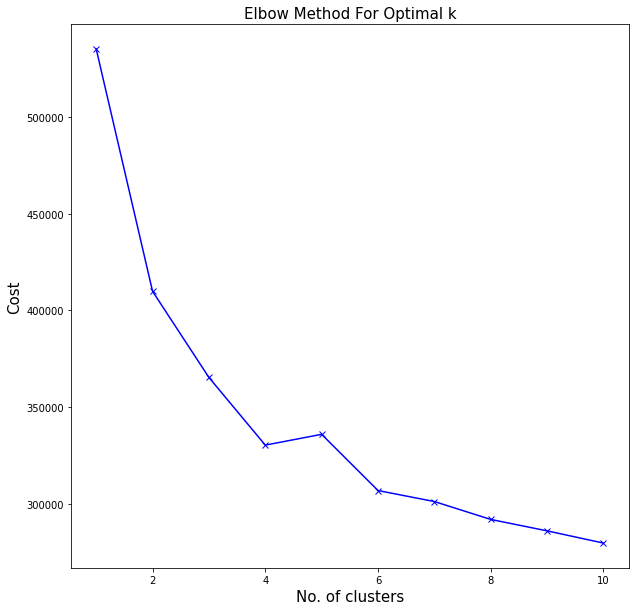

In [78]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
plt.plot(K, cost_jsh, 'bx-')
plt.xlabel('No. of clusters', size =15)
plt.ylabel('Cost', size = 15)
plt.title('Elbow Method For Optimal k', size = 15)
plt.show()

One hot encoding the data to fit in a PCA for dimensionality reduction and checking whether the elbow drop was present.

In [79]:
data_jsh = pd.concat([data_jsh.drop('ReasonForChoosingHospital', 1), data_jsh['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
data_jsh = pd.concat([data_jsh.drop('Facility_Hospital_Designation_List', 1), data_jsh['Facility_Hospital_Designation_List'].str.get_dummies(sep=",").add_prefix('Facility_')], 1)


/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_1698/2942754032.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_jsh = pd.concat([data_jsh.drop('ReasonForChoosingHospital', 1), data_jsh['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_1698/2942754032.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data_jsh = pd.concat([data_jsh.drop('ReasonForChoosingHospital', 1), data_jsh['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_1698/2942754032.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_jsh = pd.concat([data_jsh.drop('Facility_Hosp

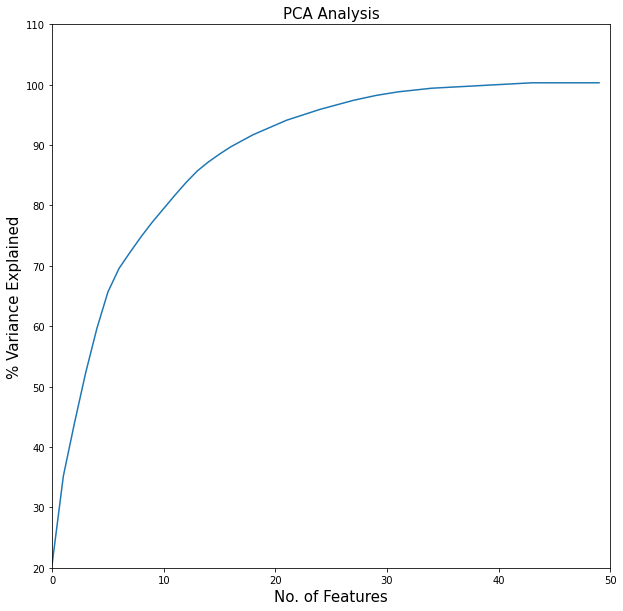

In [83]:
covar_matrix = PCA(n_components = 50) 
covar_matrix.fit(data_jsh)

#Calculate variance ratios
variance_jsh = covar_matrix.explained_variance_ratio_ 
var_jsh = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var_jsh


plt.ylabel('% Variance Explained', size = 15)
plt.xlabel('No. of Features', size = 15)
plt.title('PCA Analysis', size = 15)
plt.ylim(20,110)
plt.xlim(0,50)
plt.plot(var_jsh)

In [85]:
min_max_scaler = preprocessing.StandardScaler()
pc_datajsh = min_max_scaler.fit_transform(data_jsh)

pc_data_jsh = pd.DataFrame(pc_datajsh)
# reduce to 2 importants features
pca = PCA(n_components= 20)
ppc_jsh = pca.fit_transform(pc_data_jsh)

In [86]:
pca_cost_jsh = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(ppc_jsh)
    pca_cost_jsh.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2446940.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2446940.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2446940.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2446940.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2446940.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2446060.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2429018.0
Init: initializing centroids
Init: initializing clusters
Star

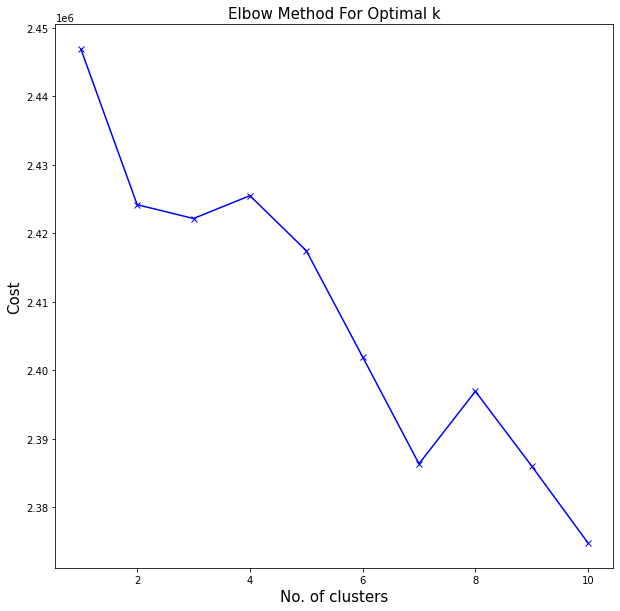

In [87]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
plt.plot(K, pca_cost_jsh, 'bx-')
plt.xlabel('No. of clusters', size = 15)
plt.ylabel('Cost', size = 15)
plt.title('Elbow Method For Optimal k' , size =15)
plt.show()

Taking only the subset of the data and then fitting the K mode clustering for that subset of the data.
And one hot encoding the complete data. 

In [131]:
data_fur = data.drop(['PatientID', 'PatientAge', 'Total_Number_of_procedures_performed', 
                      'Total_Number_of_medications_given','Number_of_units_responded',
                      'Unitprimaryactions_taken', 'Time_taken_to_be_atscene', 'Total_time_from_report_hospital', 
                      'Distance', 'SecondaryImpression', 'InitialIncidentType', 
                      'DispatchedIncidentType','ArrivedIncidentType','FinalIncidentTypeDescription',
                      'ResponseUnitID', 'UnitStation','UnitArrivalOrder','TransportUnitID', 'IncidentFirstDue',
                      'ShiftDay', 'TourOfShift','TransportHospitalCode','Number_of_units_transported',
                      'Unitotheractions_taken','ProcedurePerformed', 'MedicationGiven', 'Facility_Type_Of_Facility',
                      'UnitType','Facility Name'], axis =1)


In [132]:
data_fur

,FinalIncidentType,TransportLOC,ReasonForChoosingHospital,Procedure_given_ALS?,Medication_given_ALS?,Travel_time_taken,clean_primary_impression,Number of providers,Facility_Hospital_Designation_List
0,ASSAULT,Level 4 (BLS Care),closest facility,none_given,none_given,4.0,injury,1,hospital
1,ASSAULT,Level 2 (ALS Care),protocol,0.0,none_given,19.0,gi/gu,2,hospital
2,MEDICAL,Level 4 (BLS Care),closest facility,none_given,none_given,2.0,pain,1,hospital
3,ALS,Level 4 (BLS Care),closest facility,none_given,none_given,1.0,weakness,1,hospital
4,ALS,Level 3 (ALS Care),closest facility,1.0,0.0,8.0,respiratory,1,hospital
...,...,...,...,...,...,...,...,...,...
123778,ACCI,Level 4 (BLS Care),patient choice,0.0,none_given,23.0,injury,1,none
123779,ODF,Level 3 (ALS Care),patient choice,0.0,none_given,104.0,abuse of drugs or overdose,1,none
123780,ALS,Level 3 (ALS Care),patient choice,0.0,0.0,20.0,gi/gu,1,none
123781,ALS,Level 3 (ALS Care),patient choice,0.0,none_given,26.0,weakness,1,none


In [133]:
data_fur['Travel_time_taken'] = data_fur['Travel_time_taken'].apply(lambda x : int(x))

In [134]:
data_fur = pd.concat([data_fur.drop('ReasonForChoosingHospital', 1), data_fur['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
data_fur = pd.concat([data_fur.drop('Facility_Hospital_Designation_List', 1), data_fur['Facility_Hospital_Designation_List'].str.get_dummies(sep=",").add_prefix('Facility_')], 1)


/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_1698/2201169588.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_fur = pd.concat([data_fur.drop('ReasonForChoosingHospital', 1), data_fur['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_1698/2201169588.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data_fur = pd.concat([data_fur.drop('ReasonForChoosingHospital', 1), data_fur['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_1698/2201169588.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_fur = pd.concat([data_fur.drop('Facility_Hosp

In [135]:
data_fur = pd.get_dummies(data_fur, columns = ['FinalIncidentType',
                                        'clean_primary_impression', 'TransportLOC','Procedure_given_ALS?', 'Medication_given_ALS?', 'clean_primary_impression'])

In [136]:
cost_fur = []
K = range(1,11)
for num_clusterssc in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data_fur)
    cost_fur.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 43135, cost: 692002.0
Run 1, iteration: 2/100, moves: 15738, cost: 688227.0
Run 1, iteration: 3/100, moves: 184, cost: 688227.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 43480, cost: 710127.0
Run 2, iteration: 2/100, moves: 6627, cost: 710127.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 38824, cost: 703716.0
Run 3, iteration: 2/100, moves: 10561, cost: 703716.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 38357, cost: 712844.0
Run 4, iteration: 2/100, moves: 3840, cost: 712844.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 46105, cost: 695509.0
Run 5, iteration: 2/100, moves: 11177, cost: 693223.0
Run 5, ite

Run 5, iteration: 3/100, moves: 14821, cost: 672594.0
Run 5, iteration: 4/100, moves: 1660, cost: 672354.0
Run 5, iteration: 5/100, moves: 297, cost: 672354.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 34770, cost: 720879.0
Run 1, iteration: 2/100, moves: 8988, cost: 720764.0
Run 1, iteration: 3/100, moves: 131, cost: 720764.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 30729, cost: 728244.0
Run 2, iteration: 2/100, moves: 21940, cost: 708030.0
Run 2, iteration: 3/100, moves: 13201, cost: 699593.0
Run 2, iteration: 4/100, moves: 1993, cost: 699593.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 44208, cost: 719537.0
Run 3, iteration: 2/100, moves: 15061, cost: 690229.0
Run 3, iteration: 3/100, moves: 14406, cost: 687074.0
Run 3, iteration: 4/100, moves: 2274, cost:

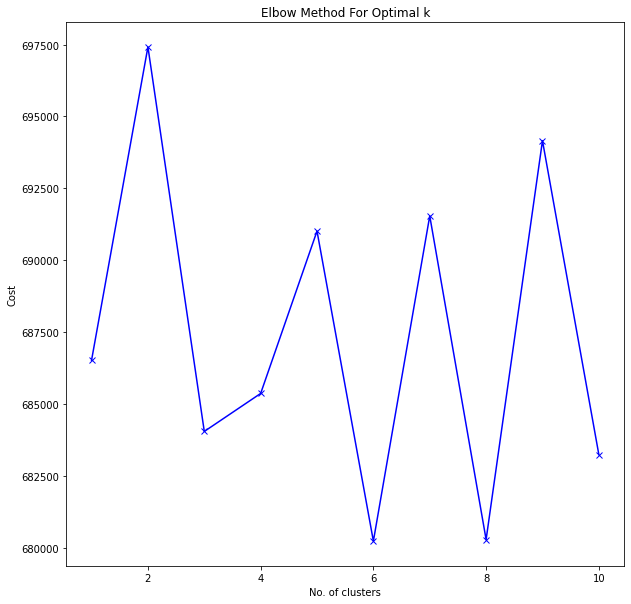

In [109]:
plt.plot(K, cost_fur, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Taking only the subset of the data and then fitting the K mode clustering for that subset of the data.
And one hot encoding the complete data. 

In [119]:
data_hh = data.drop(['PatientID', 'PatientAge', 'Total_Number_of_procedures_performed',
                     'Total_Number_of_medications_given','Number_of_units_responded',
                     'Unitprimaryactions_taken', 'Time_taken_to_be_atscene', 'Total_time_from_report_hospital',
                     'Distance', 'SecondaryImpression', 'InitialIncidentType', 'DispatchedIncidentType',
                     'ArrivedIncidentType','FinalIncidentTypeDescription','ResponseUnitID', 'UnitStation',
                     'UnitArrivalOrder','TransportUnitID', 'IncidentFirstDue','ShiftDay', 'TourOfShift',
                     'TransportHospitalCode','Number_of_units_transported','Unitotheractions_taken',
                     'ProcedurePerformed', 'MedicationGiven',
                     'Facility_Type_Of_Facility','UnitType','Number of providers', 'Travel_time_taken',
                     'FinalIncidentType','TransportLOC', 'Facility Name'], axis =1)


In [120]:
data_hh

,ReasonForChoosingHospital,Procedure_given_ALS?,Medication_given_ALS?,clean_primary_impression,Facility_Hospital_Designation_List
0,closest facility,none_given,none_given,injury,hospital
1,protocol,0.0,none_given,gi/gu,hospital
2,closest facility,none_given,none_given,pain,hospital
3,closest facility,none_given,none_given,weakness,hospital
4,closest facility,1.0,0.0,respiratory,hospital
...,...,...,...,...,...
123778,patient choice,0.0,none_given,injury,none
123779,patient choice,0.0,none_given,abuse of drugs or overdose,none
123780,patient choice,0.0,0.0,gi/gu,none
123781,patient choice,0.0,none_given,weakness,none


In [121]:
data_hh = pd.concat([data_hh.drop('ReasonForChoosingHospital', 1), data_hh['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
data_hh = pd.concat([data_hh.drop('Facility_Hospital_Designation_List', 1), data_hh['Facility_Hospital_Designation_List'].str.get_dummies(sep=",").add_prefix('Facility_')], 1)


/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_1698/3971061020.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_hh = pd.concat([data_hh.drop('ReasonForChoosingHospital', 1), data_hh['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_1698/3971061020.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data_hh = pd.concat([data_hh.drop('ReasonForChoosingHospital', 1), data_hh['ReasonForChoosingHospital'].str.get_dummies(sep=",").add_prefix('reason_')], 1)
/var/folders/hj/thk_8wb95p10ls4prllz9kxr0000gn/T/ipykernel_1698/3971061020.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_hh = pd.concat([data_hh.drop('Facility_Hospital_Des

In [122]:
cost_hh1 = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data_hh)
    cost_hh1.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 527599.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 527599.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 527599.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 527599.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 527599.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12293, cost: 376008.0
Run 1, iteration: 2/100, moves: 3705, cost: 376008.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 16442, cost: 376008.0
Init: i

Starting iterations...
Run 3, iteration: 1/100, moves: 34087, cost: 234763.0
Run 3, iteration: 2/100, moves: 12865, cost: 233921.0
Run 3, iteration: 3/100, moves: 329, cost: 233921.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 23624, cost: 224771.0
Run 4, iteration: 2/100, moves: 6039, cost: 224771.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 17482, cost: 223445.0
Run 5, iteration: 2/100, moves: 6912, cost: 223445.0
Best run was number 2


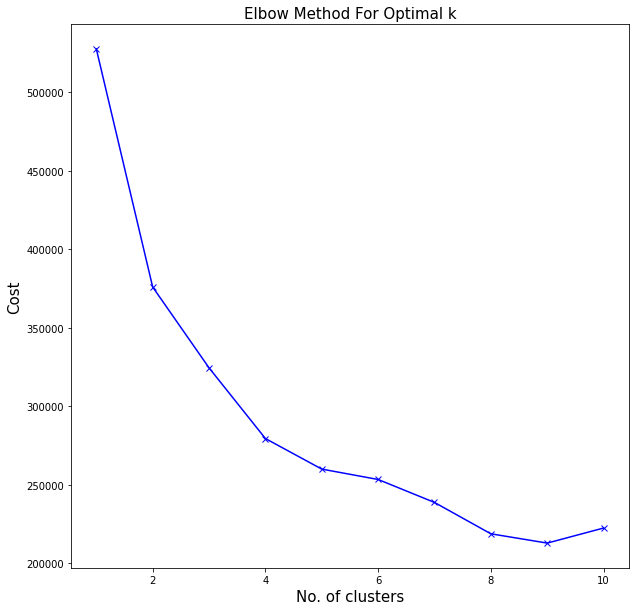

In [126]:
plt.plot(K, cost_hh1, 'bx-')
plt.xlabel('No. of clusters', size = 15)
plt.ylabel('Cost', size = 15)
plt.title('Elbow Method For Optimal k', size = 15)
plt.show()

Taking the dummies for the remaining data and fitting the PCA for that one hot encoded data.

In [137]:
data_hh = pd.get_dummies(data_hh, columns = [
                                        'clean_primary_impression','Procedure_given_ALS?', 'Medication_given_ALS?'])



KeyError: "None of [Index(['clean_primary_impression', 'Procedure_given_ALS?',\n       'Medication_given_ALS?'],\n      dtype='object')] are in the [columns]"

In [125]:
data_hh

,reason_closest facility,reason_diversion,reason_insurance status/requirement,reason_law enforcement choice,reason_on-line/on-scene medical direction,reason_other,reason_patient choice,reason_protocol,Facility_burn center,Facility_designated stroke center,...,clean_primary_impression_sepsis,clean_primary_impression_stroke,clean_primary_impression_syncope,clean_primary_impression_weakness,Procedure_given_ALS?_0.0,Procedure_given_ALS?_1.0,Procedure_given_ALS?_none_given,Medication_given_ALS?_0.0,Medication_given_ALS?_1.0,Medication_given_ALS?_none_given
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123778,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
123779,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
123780,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
123781,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [117]:
cost_hh = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data_hh)
    cost_hh.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 639344.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 639344.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 639344.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 639344.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 639344.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20210, cost: 468444.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 22926, cost: 558928.0
Init: initializing centroids
Init: initializing clusters
Sta

Starting iterations...
Run 5, iteration: 1/100, moves: 26386, cost: 272815.0
Run 5, iteration: 2/100, moves: 16398, cost: 270288.0
Run 5, iteration: 3/100, moves: 2684, cost: 269041.0
Run 5, iteration: 4/100, moves: 76, cost: 269041.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 39143, cost: 286093.0
Run 1, iteration: 2/100, moves: 10939, cost: 286093.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 17644, cost: 269997.0
Run 2, iteration: 2/100, moves: 16067, cost: 261468.0
Run 2, iteration: 3/100, moves: 3829, cost: 261468.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 30574, cost: 300762.0
Run 3, iteration: 2/100, moves: 1257, cost: 300762.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 27842, cost: 26

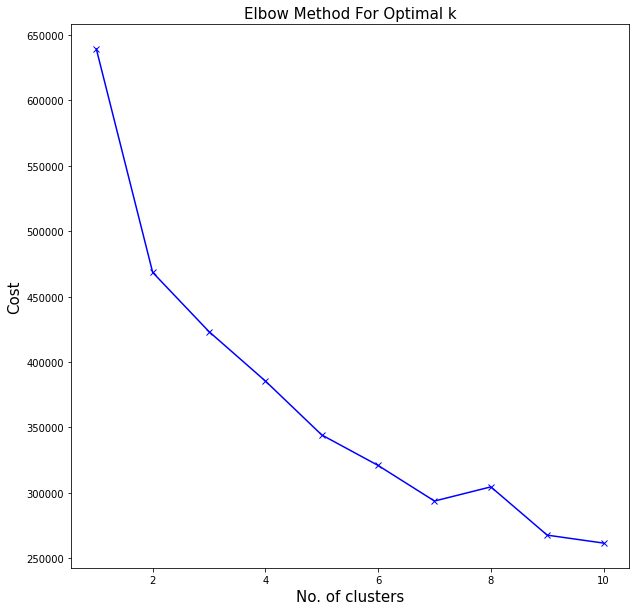

In [129]:
plt.plot(K, cost_hh, 'bx-')
plt.xlabel('No. of clusters', size = 15)
plt.ylabel('Cost', size = 15)
plt.title('Elbow Method For Optimal k', size = 15)
plt.show()

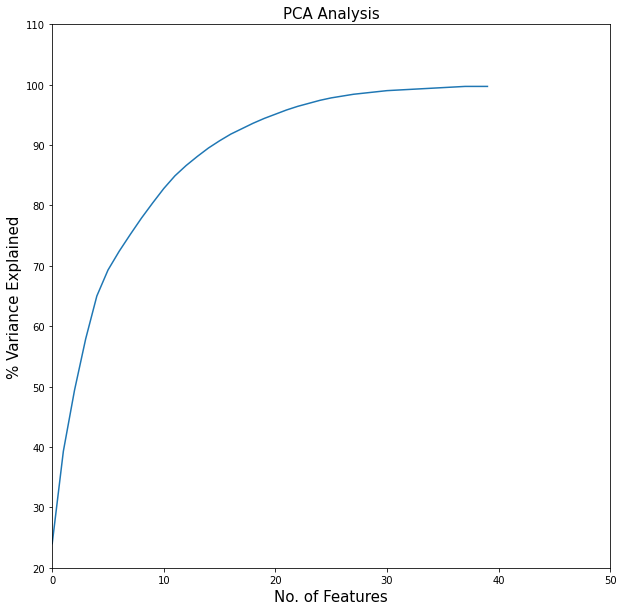

In [128]:
covar_matrix = PCA(n_components = 40) 
covar_matrix.fit(data_hh)

#Calculate variance ratios
variance_hh = covar_matrix.explained_variance_ratio_ 
var_hh = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var_hh


plt.ylabel('% Variance Explained', size = 15)
plt.xlabel('No. of Features', size = 15)
plt.title('PCA Analysis', size = 15)
plt.ylim(20,110)
plt.xlim(0,50)
plt.plot(var_hh)

In [ ]:
min_max_scaler = preprocessing.StandardScaler()
pc_dathh = min_max_scaler.fit_transform(data_hh)

pc_dathh1 = pd.DataFrame(pc_dathh)
# reduce to 2 importants features

pca = PCA(n_components= 20)
ppc_hh = pca.fit_transform(pc_dathh1)
ppc_hh